In lecture 3 we saw how gaussian inference turns into linear-algebra.

In lecture 4 we'll see how linear algebra <i>is</i> gaussian inference.

why is this useful to know?

Given $p(x) = \mathcal{N}(x; \mu, \Sigma)$ then \
$p(x \mid y = \mathcal{N}(x; \mu', \Sigma')$ \
here $\mu'$ and $\Sigma'$ are expressed in terms of `Precision Matrix` or `Gain + Residual + Gram`. This is the most basic machine-learning architecture. It has observations and unkowns which are related by a linear model $y = Ax + b$ 

what does PyTorch DataLoader do? its a piece of code that goes through the dataset and randomly picks batches of data. why? why not just specific data points? why batches? in linear algebra there are precise answers to these questions.



Observations are described by a linear transformation of the distribution variable. \
Measurements can change with time. \
For $n$ observations, there could be $n$ separate affine-transformations $A_{i...n}, \vec{b}_{i...n}$ \
$A^T\vec{x} = \vec{b} \quad $  where $A \in \mathbb{R}^{M \times N}$, $ \vec{b} \in \mathbb{R}^N , \vec{x}  \in \mathbb{R}^M$ \
Assume $A$ has full-rank (i.e all independant columns) \
Assume $N \leq M$ i.e we have more unknown parameters than data points. \
Find $\vec{x} \in \mathbb{R}^{M}$ the distribution of parameters that _best_ descirbes the data points 

#### Gram-Schmidt
The Gram-Schmidt process is a method for turning a set of linearly independent vectors into an orthonormal set that spans the same subspace.

Given a span of vectors $\vec{v_i}$ we need to produce a span of orthonormal vectors $\vec{u}_i$. \
The idea is to subtract the projection of $\vec{v}_i\cdot \vec{v}_{i+1}$ from $v_{i+1}$ from other 

1. $\vec{u}_0 = \vec{v}_0/\lVert \vec{v}_0 \rVert$
2. $\vec{u}_1 = \vec{w}_1/\lVert \vec{w}_1 \rVert$  where $\vec{w}_1 = \vec{v}_1 - (\vec{v}_1\cdot \vec{u}_0)\vec{u}_0$
3. $\vec{u}_2 = \vec{w}_2/\lVert \vec{w}_2 \rVert$  where $\vec{w}_2 = \vec{v}_2 - (\vec{v}_2 \cdot \vec{u}_1) \vec{u}_1 - (\vec{v}_1 \cdot \vec{u}_0 ) \vec{u}_0$

#### Singular Value Decomposition

we want to solve $A\vec{x} = \vec{b}$ where $A \in \mathbb{R}^{M \times N}, \vec{b} \in \mathbb{R}^M, \vec{x} \in \mathbb{R}^N$ 

And we want to consider 3 possible case 

1. $A$ is square, full rank i.e $M = N$. SVD can solve this exactly. 
2. Overdetermined i.e $M > N$. SVD can find $\vec{x}$ that minimizes $\lVert A \vec{x} - \vec{b}\rVert^2$. 
3. Underdetermined i.e $M<N$ there are infinitely many solutions for $\vec{x}$ that satisfies $A\vec{x} = \vec{b}$ but SVD will give use the __minimum-norm solution__ i.e the $\vec{x}$ with minimum $\lVert \vec{x} \rVert ^2$

#### How SVD works
The SVD decomposes $A = Q D U^T$ where 
- $Q \in \mathbb{R}^{M \times M} $ is orthogonal
- $ D \in \mathbb{R}^{M \times N} $ is diagonal
- $ U \in \mathbb{R}^{N \times N}$ is orthogonal

Now, solving for $\vec{x} = A^{-1}\vec{b}$ is just $\vec{x} = U D^{-1} Q^T \cdot \vec{b}$ and since $D$ is diagonal, the $D^{-1}$ is just element-wise reciprocal. 

In [10]:

# The inverse of A is implemented as a standalone method here 
# because computing the inverse of A is the most time-consuming part of 
# using SVD to solve linear equations

import numpy as np

A = np.array([[1,2,3],[4,5,6],[7,8,9]])
b1 = np.array([9.1,2,3])
b2 = np.array([0.1,2,3])
b3 = np.array([1,2,3])

def solver(A): # for A in M x N
    Q,D,Ut = np.linalg.svd(A.T, full_matrices=False)
    return lambda b: Ut.T @ ((Q.T @ b) / D)

slv = solver(A)
x1 = slv(b1)
x2 = slv(b2)
x3 = slv(b3)

print(x1)
print(x2)
print(x3)

[-2.67900287e+16  5.35800573e+16 -2.67900287e+16]
[ 2.97666985e+15 -5.95333970e+15  2.97666985e+15]
[-0.96555419  3.93110838 -1.96555419]


now put these ideas aside and imagine you've just had undergrad linear algebra. you know about matrices and inverses but you dont know about SVD. And you're encountering the problerm of evaluating the posterior given a series of observations. 

$p(z \mid B^Tz = y + \epsilon) = \mathcal{N}(z; m + \Delta m, V - \Delta V)$ where \
$\Delta m = VB(B^TVB + \Lambda)^{-1}(y - B^Tm)$ \
$\Delta V = VB(B^TVB + \Lambda)^{-1}B^TV$

This is actually an imoprtant lecture. I dont fully understand what he's trying to do. but he has an algorithm for computing $p(X \mid y_1,...y_n)$ i.e the posterior given some observations. But, his algorithm allows you to stop at any $ i\leq n$. So that's a computational advantage. I might understand it if i came back to it at a later time

#### Here's my attempt at trying to find an expression for $P(x|y_1,...y_n)$

$P(x) \sim \mathcal{N}(x;\mu_0,\Sigma_0)$ \
$y_i = A_i \cdot x + b_i + \Lambda $ where $\Lambda \sim \mathcal{N}(0,\lambda^2)$ is the measurement noise

$P(x|y_1) = \mathcal{N}(x, \mu_1, \Sigma_1)$ where $\mu_1,\Sigma_1$ are expressed in terms of the `Precision Matrix` or `Gain * Residue` 

Then $P(x|y_1,y_2) = \frac{P(y_1 y_2 | x) * P(x)}{P(y_1 y_2)}$ 

Then $P(x|y_1,y_2) = \frac{P(y_1 y_2 | x) * P(x)}{\int P(y_1 y_2 | x)dx}$

$P(y_1 y_2 | x) = P(y_1 | x)P(y_2 | x)$ because $y_1,y_2$ are independant measurements when fixed on a conditional $x$ 

$P(y_1|x)$ and $P(y_2|x)$ are both gaussians with the same variance as $\Lambda$ with just the mean shifted to $A_i x + b_i$

So this can be calculated analytically, complete the squares, you get one big ugly gaussian for $P(x|y_1,y_2)$

But the trick is to express $P(x|y_1,y_2)$ in terms of $\mu_1$ and $\Sigma_1$ that we computed for $P(x|y_1)$



### And here's how he does it 
_he considers the case where the observation are noiseless, scalar and the transofrmation $A_i$ is just a vector_ i.e $y_i = a_i.x$ 

Computing $P(x|y_1)$ gives us \
$\Sigma_1 = \Sigma_0 - \Sigma_0 A_1 (A_1^T \Sigma_0 A_1 + \Lambda)^{-1}(A_1^T \Sigma_0)$ 

Now use $P(x|y_1)$ as the __prior__ for the $P(x|y_1 y_2)$. I'm not sure what the correct notation for it would be - perhaps $P((x|y_1) | y_2)$. Then we get 

$\Sigma_2 = \Sigma_1 - \Sigma_1 A_2 (A_2^T \Sigma_1 A_2 + \Lambda)^{-1}(A_2^T \Sigma_1)$ 

More generally: \
$\Sigma_i = \Sigma_{i-1} - u_{i}\cdot u_{i}^T$ \
$\Sigma_i = \Sigma_0 - \lbrack u_1\cdot u_1^T + ... + u_i\cdot u_i^T \rbrack$ \
where $u_i = \frac{1}{\sqrt{A_i^T \Sigma_{i-1} A_i}}\cdot \Sigma_{i-1} A_i$ \
and $u_i \Sigma_0^{-1}u_j = \delta_{i,j}$ \
${u_i}$ is orthonormal under transformation of $\Sigma_0$ \
$\Sigma_0$ is a space that spans the original prior distribution of $P(x)$ \ 
$A_i$ is just a vector so $u_i \cdot u_i^T$ is an outer-product not an inner-product. \
_not sure how this generalizes to matrix-transofrmations for observations. \
also he assumes noise-less measurements i.e $\Lambda = 0$ so I'm not sure if the orthogonality of ${u_i}$ would still be valid in the noisy measurements_

This is just rediscovering the __Gram-Schmidt Process__

And similarly, for the $\mu_i$ \
$\mu_i = \mu_{i-1} + \zeta_0 u_0 + ... + \zeta_{i}u_i$ \
where $\zeta_j = \frac{1}{\sqrt{a_j^T\sum_{j-1}a_j}} \cdot (y_j - a_j^T\mu_0 - \Sigma_{i=1}^{j-1}a_j^T u_i \zeta_i ) $ 

and $R_{ij} = u_i^Ta_j = a_j^Tu_i \in \mathbb{R}^{n \times n}$ is an upper-triangular matrix. Our algorithm should keep track of this matrix. 

$\mu_n = \mu_0 + \sum_{j=1}^{n} \zeta_j u_j$

In [36]:
from dataclasses import dataclass
from typing import Self
from jax import numpy as jnp
from jaxtyping import Array,Float
import functools

@dataclass
class Gaussian:
    mu: Float[Array, "D"]
    sigma: Float[Array, "D D"]

    @functools.cached_property
    def cov_svd(self):
        """ compute AA' = Sigma """
        if(jnp.isscalar(self.mu)):
            return jnp.eye(1),jnp.sqrt(self.sigma).reshape(1,1)
        else:
            U,D,V = jnp.linalg.svd(self.sigma, full_matrices=True, hermitian=True)
            return U,jnp.sqrt(D) # RETURN THE SQRT OF DIAGONALIZED-SIGMA

    @functools.cached_property
    def logdet(self):
        """ log-determinant of the covariance matrix eg: for computing the log-pdf """
        _,D = cov_svd
        return 2 * jnp.sum(jnp.log(D))

    @functools.cached_property
    def precision(self):
        """ precision is the inverse of the covariance-matrix """
        """ you probably dont want to call this directly, but rather through prec_mult """
        U,D = self.cov_svd
        return U @ jnp.diag(1/D)**2 @ U.T
        
    def prec_mult(self, x:Float[Array,"D "]) -> Float[Array, "D "]:
        """ precision matrix multiplication """
        """ implements Sigma^{-1} @ x. For numerical-stability we use the Cholesky factorization """
        U,D = self.cov_svd
        return U @ jnp.diag(1/D**2) @ U.T @ x

    @functools.cached_property
    def mp(self):
        """ precision-adjusted-mean """
        return self.prec_mult(self.mu)


    def log_pdf(self, x:Float[Array,"D "]) -> float:
        """log N(x; mu,sigma)"""
        return (
            -0.5 * (x - self.mu) @ jnp.linalg.solve(self.sigma, x - self.mu)
            -0.5 * jnp.linalg.slogdet(self.sigma)[1]
            -0.5 * len(self.mu) * jnp.log(2*jnp.pi)
        )

    def pdf(self,x:Float[Array, "D "]) -> float:
        """N(x; mu,sigma)"""
        return jnp.exp(self.log_pdf(x))

    def cdf(self, x):
        if jnp.isscalar(x):
            return 0.5 * (1 + jax.scipy.special.erf((x-self.mu) / jnp.sqrt(2*self.sigma)))
        else:
            raise NotImplementedError("CDF not implelemented for multivariate gaussians")

    def __mult__(self, other:Self)->Self:
        """ multiplication of two gaussian PDFs """
        sigma = jnp.linalg.inv(self.precision + other.precision)
        mu = sigma @ (self.mp + other.mp)
        return Gaussian(mu = mu, sigma = sigma)

    def __rmatmul__(self, A:Float[Array, "N D"])->Self:
        """ Linear maps of Gaussian RVs are Gaussian RVs """
        return Gaussian(mu = A @ self.mu, sigma = A@self.sigma @A.T)
        

    def condition(self, A:Float[Array, "N D"], y:Float[Array, "N"], 
                 Lambda: Float[Array, "N N"]) -> Self:
        """ Linear conditionals of Gaussian RVs are Gaussian RVs 
        returns p(self | y) = N(y; A @ self, Lambda) * self/p(y)
        where Lambda is noise N(0,lambda)
        """
        Gram = A @ self.sigma @ A.T + Lambda
        L = jax.scipy.linalg.cho_factor(Gram, lower=True)
        mu = self.mu + self.sigma @ A.T @ jax.scipy.linalg.cho_solve(L, y - A@self.mu)
        sigma = self.sigma - self.sigma @ A.T @ jax.scipy.linalg.cho_solve(L, A @ self.sigma)
        return Gaussian(mu=mu, sigma=sigma)
            

In [75]:
from jax import numpy as jnp
from jaxtyping import Array, Float

# decompose the A matrix into U.R where U.Sigma.U = I
# the columns of U are orthonormal in the covariance-space 
# At each iteration (data-point) the covariance reduces by u_n.u_n
# u_n is the projection of a_n through the covariance-space

history = [] # to store R,U,Sigma matrices for evolution visualization

def GEQRF(
    A: Float[Array, "M N"], # the observation transformation
    prior: Gaussian         # the gaussian prior p(x)
) -> (
    Gaussian, 
    Float[Array, "M M"], # the upper-triangular matrix R
    Float[Array, "M N"], # the U matrix made up of orthonormal u_i
    Float[Array, "M M"], # The covariance-matrix of the gaussian posterior
    
):

    M,N = A.shape # dimensions
    U = jnp.zeros((M,N))
    R = jnp.zeros((N,N))
    nu = jnp.zeros(N) # storage

    Sigma = prior.sigma


    for n in range(N): # matrix decomposition
        an = A[: , n] # the nth column
        
        # update the U matrix
        un = Sigma @ an                     # u_n = projection of a_n through prior-covariance
        un = un / jnp.sqrt(jnp.dot(an,un))  # normalize the u_n
        U = U.at[: , n].set(un)             # set U's nth column as u_n
        
        # compute upper-triangular matrix R  
        R = R.at[: n + 1, n].set(an.T @ U[:, : n + 1])

        # update the prior covariance for the next posterior 
        nu = nu.at[n].set(jnp.dot(an, prior.mu))
        Sigma = Sigma - jnp.outer(un,un)

        history.append((R.copy(), U.copy(), Sigma.copy(), f"step {n+1}"))
        
    # takes as input the measurement b_i from a_i.x = b_i 
    def solve(b:Float[Array, "N"]) -> Gaussian:
        alpha = jnp.zeros((N,))
        alpha = alpha.at[0].set((b[0] - nu[0])/R[0,0])
        for n in range(1,N):
            alpha = alpha.at[n].set(
                (b[n] - nu[n] -jnp.dot(alpha[:n],R[:n,n])) / R[n,n]
            )
        return Gaussian(prior.mu + U @ alpha, Sigma)
    
    return solve, R, U, Sigma
                

In [77]:
mu1 = jnp.array([1.0,1.0])
sigma1 = jnp.array([[1, 0.5],[0.5,2]])
G1 = Gaussian(mu1,sigma1)
A = jnp.array([
    [0.1,0.2],
    [0.6,0.7]
])

GEQRF(A,G1)

(<function __main__.GEQRF.<locals>.solve(b: jaxtyping.Float[Array, 'N']) -> __main__.Gaussian>,
 Array([[0.8888195 , 1.074459  ],
        [0.        , 0.07441735]], dtype=float32),
 Array([[ 0.45003515,  0.8930135 ],
        [ 1.4063599 , -0.14883621]], dtype=float32),
 Array([[-4.7087669e-06,  1.3560057e-06],
        [ 1.3560057e-06, -3.8929284e-07]], dtype=float32))

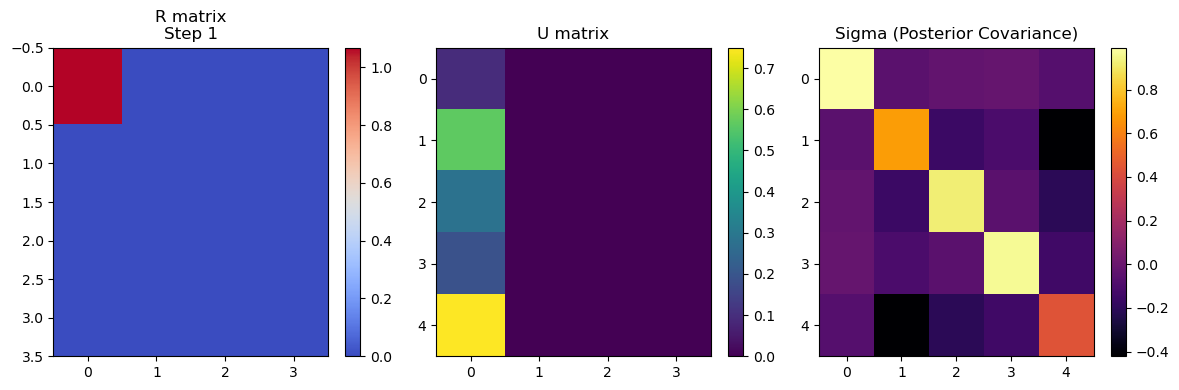

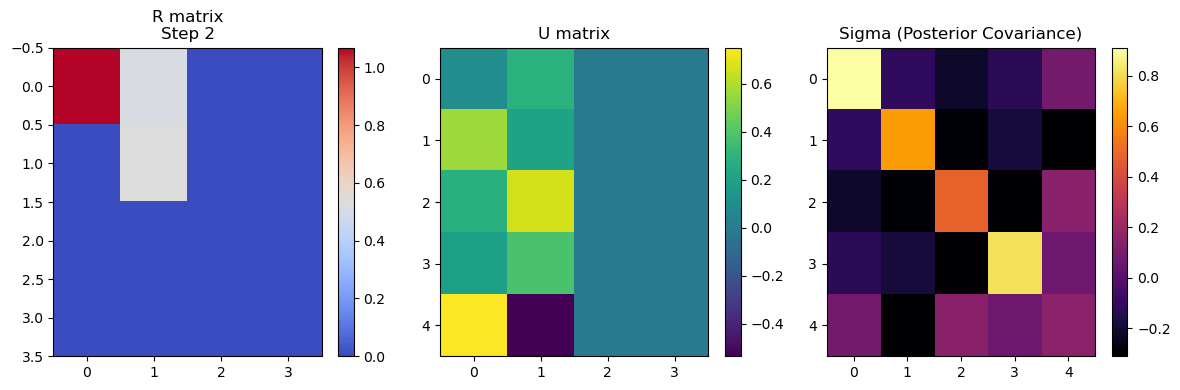

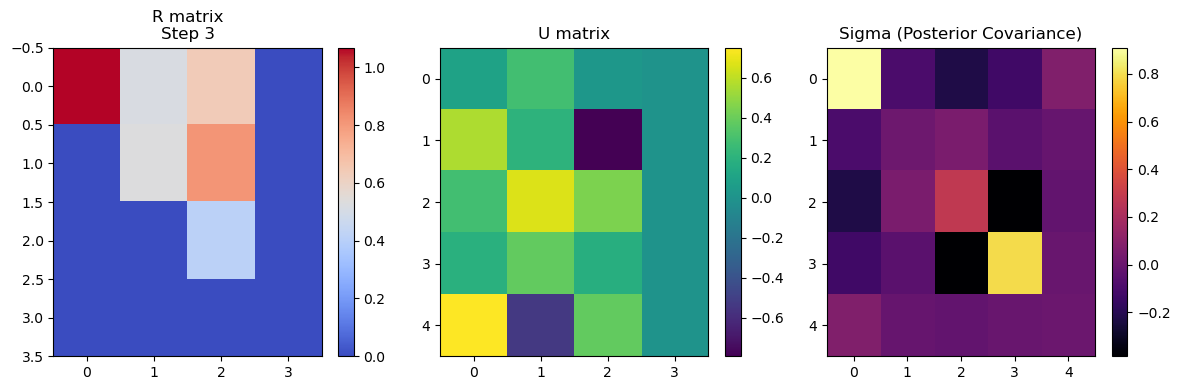

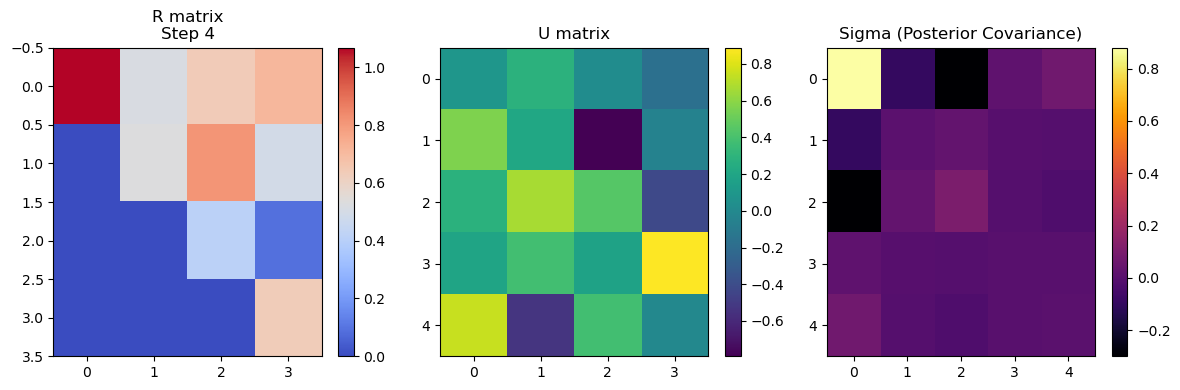

In [83]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from typing import NamedTuple


def GEQRF_visualize(A, prior: Gaussian):
    M, N = A.shape
    U = jnp.zeros((M, N))
    R = jnp.zeros((N, N))
    nu = jnp.zeros(N)
    Sigma = prior.sigma

    history = []  # To store R, U, Sigma snapshots

    for n in range(N):
        an = A[:, n]
        un = Sigma @ an
        un = un / jnp.sqrt(jnp.dot(an, un))
        U = U.at[:, n].set(un)
        R = R.at[:n+1, n].set(an.T @ U[:, :n+1])
        nu = nu.at[n].set(jnp.dot(an, prior.mu))
        Sigma = Sigma - jnp.outer(un, un)

        # Save copies for visualization
        history.append((
            R.copy(), U.copy(), Sigma.copy(), f"Step {n+1}"
        ))

    return history


# --- Visualization Function ---

def plot_matrices(history):
    for step, (R, U, Sigma, label) in enumerate(history):
        fig = plt.figure(figsize=(12, 4))
        gs = gridspec.GridSpec(1, 3)

        ax1 = fig.add_subplot(gs[0, 0])
        im1 = ax1.imshow(R, cmap="coolwarm", aspect='auto')
        ax1.set_title(f"R matrix\n{label}")
        fig.colorbar(im1, ax=ax1)

        ax2 = fig.add_subplot(gs[0, 1])
        im2 = ax2.imshow(U, cmap="viridis", aspect='auto')
        ax2.set_title("U matrix")
        fig.colorbar(im2, ax=ax2)

        ax3 = fig.add_subplot(gs[0, 2])
        im3 = ax3.imshow(Sigma, cmap="inferno", aspect='auto')
        ax3.set_title("Sigma (Posterior Covariance)")
        fig.colorbar(im3, ax=ax3)

        plt.tight_layout()
        plt.show()


# --- Example Usage ---

# Observation matrix A
A = jnp.array([
    [0.1, 0.2, 0.3,0.1],
    [0.6, 0.4, 0.2,0.4],
    [0.3, 0.5, 0.9,0.3],
    [0.2, 0.3, 0.5,0.9],
    [0.8, 0.1, 0.2,0.3],
])

# Prior: mean 0, identity covariance
prior = Gaussian(mu=jnp.zeros(5), sigma=jnp.eye(5))

# Run and visualize
history = GEQRF_visualize(A, prior)
plot_matrices(history)


### summary of the algorithm
we are given a gaussian prior $p(x)$ and a sequence of $N$ affine constraints $a_i.x = b_i$ for $i = 1,...N$.  \
$x$ lies on a $M$-dimensional hyperplane but we have $N < M$ constraints \
the constraints define an affine subspace. \
we project the gaussian prior onto this subspace \

instead of solving $Ax = b$ directly, we decompose $A$ into $U.R$. The matrix $U$ captures the direction along which the constraint vectors reduce uncertainity the most i.e the column-vectors of $U$ are projections of $a_i$ through the prior-covariance i.e $u_i = \Sigma. a_i$
The $R$ matrix is there to reconstruct the $A$ matrix from $U$ matrix. i.e A = U.R. 

Once we get the u_i's we normalize them according to their norm in the covariance-space i.e $a_i^T.\Sigma.a_i$

To get the R matrix we express each a_i in the u_i basis 
$a_i^T = \Sigma_j R_{ji}u_j^T$

So $R_{ij}$ is the component of $a_i$ in the $u_j$ space

Or $R_{ij} = a_i.u_j = a_j.u_i$


### 1D case with measurement noise

sigma2 = 1.0 | v = 1.0 | a = 1 | b = 0.1 | s = 1.01
sigma2 = 0.00990099009900991 | v = 0.010891089108910902 | a = 1.1 | b = 0.135 | s = 0.021980198019801993
sigma2 = 0.004504504504504505 | v = -0.005405405405405407 | a = -1.2 | b = -0.1482 | s = 0.016486486486486488


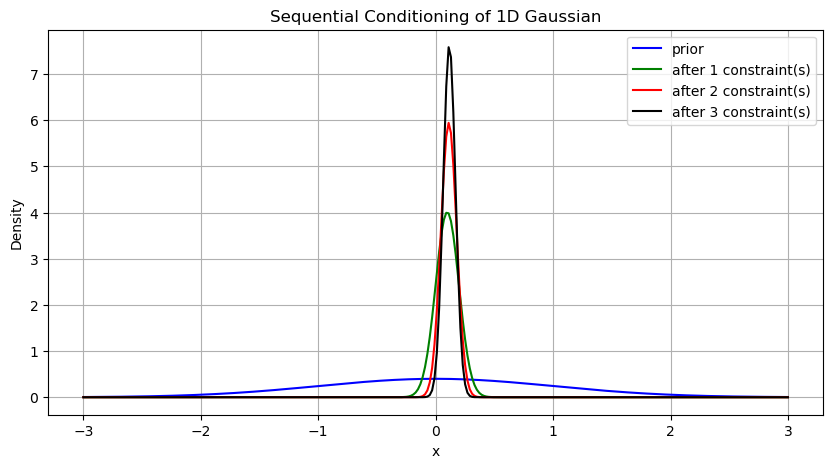

In [110]:

import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

# Initial prior
mu = 0.0
sigma2 = 1.0  # scalar variance
epsilon = 0.01 # measurement noise

# List of observations: (a_i, b_i)
observations = [
    (1, 0.1),   # a1 x = b1
    (1.1, 0.135),   # a2 x = b2
    (-1.2, -0.1482)  # a3 x = b3
]

# For visualization
x_vals = jnp.linspace(-3, 3, 300)
colors = ['blue', 'green', 'red', 'black']
labels = ['prior']

# Storage for plotting
pdfs = []

# Initial prior PDF
def gaussian_pdf(x, mu, sigma2):
    return (1 / jnp.sqrt(2 * jnp.pi * sigma2)) * jnp.exp(-0.5 * (x - mu)**2 / sigma2)

pdfs.append(gaussian_pdf(x_vals, mu, sigma2))

# Sequential updates to compute posterior mean and variance
for i, (a, b) in enumerate(observations):

# v is the covariance between b and x where b_i = a_i.x + epsilon
# you can check this by doing linear transofmration of p(x -> ax + epsilon)
    v = sigma2 * a

# s is the total varaince in P(b)
    s = a * v  + epsilon # = a^2 * sigma^2 + epsilon

    print(f"sigma2 = {sigma2} | v = {v} | a = {a} | b = {b} | s = {s}")

# Kalman-style update (noise-free measurement)
# this is the "gain" i.e how much we learn 
# v is the covariance of <b,x>.
# s is the total variance in P(b) = <b>^2 - <b>
# high v and low s means we can learn a lot about x from the 
# measurements of b and those measurements are not too noisy
    K = v / s

    
    mu = mu + K * (b - a * mu) # this is the gain * residual
    sigma2 = sigma2 - K * v  # = sigma2 - (sigma2 a)^2 / (a^2 sigma2 + epsilon)

    # Save updated PDF
    pdfs.append(gaussian_pdf(x_vals, mu, sigma2))
    labels.append(f'after {i+1} constraint(s)')

# Plot all PDFs
plt.figure(figsize=(10, 5))
for i, pdf in enumerate(pdfs):
    plt.plot(x_vals, pdf, color=colors[i], label=labels[i])
plt.title("Sequential Conditioning of 1D Gaussian")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()
